# CatBoost

## Importing the libraries

In [1]:
!pip install catboost

  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training CatBoost on the Training set

In [4]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train, verbose=0)

## Making the Confusion Matrix

0.9781021897810219

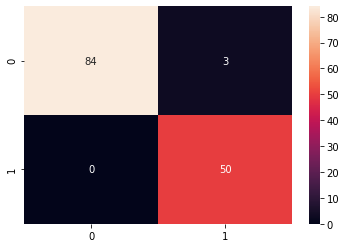

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
accuracy_score(y_test, y_pred)

## Applying k-Fold Cross Validation

In [7]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Learning rate set to 0.007604
0:	learn: 0.6772057	total: 1.09ms	remaining: 1.09s
1:	learn: 0.6652633	total: 2.19ms	remaining: 1.09s
2:	learn: 0.6511784	total: 3.09ms	remaining: 1.03s
3:	learn: 0.6360094	total: 4.01ms	remaining: 1000ms
4:	learn: 0.6221218	total: 4.92ms	remaining: 978ms
5:	learn: 0.6065689	total: 5.82ms	remaining: 964ms
6:	learn: 0.5931935	total: 6.79ms	remaining: 964ms
7:	learn: 0.5783827	total: 7.43ms	remaining: 921ms
8:	learn: 0.5646398	total: 8.32ms	remaining: 917ms
9:	learn: 0.5508871	total: 9.47ms	remaining: 937ms
10:	learn: 0.5390346	total: 10.4ms	remaining: 938ms
11:	learn: 0.5279564	total: 11.3ms	remaining: 932ms
12:	learn: 0.5181720	total: 12.2ms	remaining: 927ms
13:	learn: 0.5055409	total: 13.1ms	remaining: 921ms
14:	learn: 0.4943123	total: 14ms	remaining: 918ms
15:	learn: 0.4824866	total: 14.9ms	remaining: 914ms
16:	learn: 0.4729889	total: 15.7ms	remaining: 909ms
17:	learn: 0.4638986	total: 16.6ms	remaining: 905ms
18:	learn: 0.4549171	total: 17.3ms	remaining:

In [8]:
#from the confusion matrix
precision = cm[0][0]/(cm[0][0] + cm[0][1])
recall = cm[0][0] / (cm[0][0] + cm[1][0])
f1_score = (2*recall*precision)/(precision+recall)

In [9]:
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1_score)

Precision:  0.9655172413793104
Recall:  1.0
F1-Score:  0.9824561403508771


## Grid Search CV

In [10]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(10, 200, 5),
    'learning_rate': [0.1,0.3, 0.01, 0.05,0.001]
}
grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = -1, # use all available processors
    cv = 10,
    verbose=True,
    refit=True
)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 1520 candidates, totalling 15200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

0:	learn: 0.6563646	total: 294us	remaining: 46.9ms
1:	learn: 0.6226791	total: 677us	remaining: 53.5ms
2:	learn: 0.5936125	total: 983us	remaining: 51.5ms
3:	learn: 0.5671753	total: 1.29ms	remaining: 50.2ms
4:	learn: 0.5406946	total: 1.59ms	remaining: 49.4ms
5:	learn: 0.5150926	total: 1.9ms	remaining: 48.7ms
6:	learn: 0.4917204	total: 2.19ms	remaining: 48ms
7:	learn: 0.4698987	total: 2.49ms	remaining: 47.3ms
8:	learn: 0.4509510	total: 2.79ms	remaining: 46.9ms
9:	learn: 0.4322321	total: 3.09ms	remaining: 46.4ms
10:	learn: 0.4146628	total: 3.39ms	remaining: 45.9ms
11:	learn: 0.3976924	total: 3.69ms	remaining: 45.5ms
12:	learn: 0.3813679	total: 3.99ms	remaining: 45.1ms
13:	learn: 0.3657847	total: 4.29ms	remaining: 44.7ms
14:	learn: 0.3530994	total: 4.57ms	remaining: 44.2ms
15:	learn: 0.3401725	total: 4.86ms	remaining: 43.8ms
16:	learn: 0.3275873	total: 5.19ms	remaining: 43.6ms
17:	learn: 0.3155827	total: 5.48ms	remaining: 43.2ms
18:	learn: 0.3044553	total: 5.79ms	remaining: 43ms
19:	learn: 

[Parallel(n_jobs=-1)]: Done 15200 out of 15200 | elapsed: 17.7min finished


GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000021F179537C0>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.01, 0.05, 0.001],
                         'max_depth': range(2, 10),
                         'n_estimators': range(10, 200, 5)},
             scoring='roc_auc', verbose=True)

In [11]:
grid_search.best_estimator_

In [12]:
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 160}

In [13]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier(learning_rate = grid_search.best_params_['learning_rate'], max_depth = grid_search.best_params_['max_depth'], n_estimators = grid_search.best_params_['n_estimators'])
classifier.fit(X_train, y_train, verbose=0)

0.9562043795620438

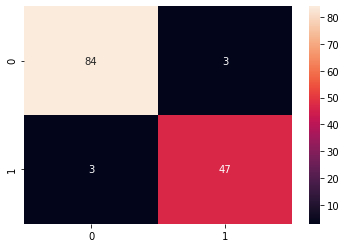

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
accuracy_score(y_test, y_pred)

In [15]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

0:	learn: 0.6557608	total: 265us	remaining: 42.2ms
1:	learn: 0.6216638	total: 652us	remaining: 51.5ms
2:	learn: 0.5895903	total: 964us	remaining: 50.5ms
3:	learn: 0.5636119	total: 1.27ms	remaining: 49.4ms
4:	learn: 0.5370987	total: 1.56ms	remaining: 48.4ms
5:	learn: 0.5114496	total: 1.86ms	remaining: 47.9ms
6:	learn: 0.4878138	total: 2.17ms	remaining: 47.4ms
7:	learn: 0.4659955	total: 2.42ms	remaining: 45.9ms
8:	learn: 0.4486642	total: 2.65ms	remaining: 44.5ms
9:	learn: 0.4299196	total: 2.88ms	remaining: 43.3ms
10:	learn: 0.4129942	total: 3.19ms	remaining: 43.3ms
11:	learn: 0.3959804	total: 3.5ms	remaining: 43.2ms
12:	learn: 0.3798286	total: 3.82ms	remaining: 43.2ms
13:	learn: 0.3642539	total: 4.12ms	remaining: 43ms
14:	learn: 0.3505071	total: 4.33ms	remaining: 41.9ms
15:	learn: 0.3370186	total: 4.64ms	remaining: 41.8ms
16:	learn: 0.3241703	total: 4.95ms	remaining: 41.6ms
17:	learn: 0.3112088	total: 5.26ms	remaining: 41.5ms
18:	learn: 0.3001254	total: 5.56ms	remaining: 41.3ms
19:	learn

In [16]:
#from the confusion matrix
precision = cm[0][0]/(cm[0][0] + cm[0][1])
recall = cm[0][0] / (cm[0][0] + cm[1][0])
f1_score = (2*recall*precision)/(precision+recall)

In [17]:
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1_score)

Precision:  0.9655172413793104
Recall:  0.9655172413793104
F1-Score:  0.9655172413793104
